<a href="https://colab.research.google.com/github/WesleyAldridge/HW3_MachineLearning/blob/master/HW3_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 - Data Visualization For cats and dogs data set using convnet VGG19

###Instructions from professor:

"The goal of this homework is to learn how to leverage pretrained convnets and to use some visualization techniques. You will work with the data set cats vs dogs and use the pretrained convnet VGG19.

Experiment with different classifiers, trying to maximize the validation accuracy. You only need to show one classifier."

### Getting the cats_and_dogs data

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 17:12:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  44.8MB/s    in 1.5s    

2019-04-17 17:12:59 (44.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Problem 1

Do feature extraction with data augmentation.

In [8]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 2s 0us/step


In [0]:
conv_base.trainable = False

In [10]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# no dropout
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 23s 228ms/step - loss: 0.6253 - acc: 0.6400 - val_loss: 0.5044 - val_acc: 0.7740
Epoch 2/30
100/100 [==============================] - 18s 176ms/step - loss: 0.5306 - acc: 0.7400 - val_loss: 0.4285 - val_acc: 0.8070
Epoch 3/30
100/100 [==============================] - 18s 180ms/step - loss: 0.4791 - acc: 0.7825 - val_loss: 0.3811 - val_acc: 0.8350
Epoch 4/30
100/100 [==============================] - 19s 185ms/step - loss: 0.4594 - acc: 0.7835 - val_loss: 0.3663 - val_acc: 0.8400
Epoch 5/30
100/100 [==============================] - 19s 190ms/step - loss: 0.4353 - acc: 0.7975 - val_loss: 0.3319 - val_acc: 0.8550
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.4088 - acc: 0.8170 - val_loss: 0.3227 - val_acc: 0.8580
Epoch 7/30
100/100 [==============================] - 18s 

# Problem 2

Do fine-tuning with data augmentation.

In [81]:
conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [82]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 204ms/step - loss: 0.5976 - acc: 0.6885 - val_loss: 0.4744 - val_acc: 0.7870
Epoch 2/30
100/100 [==============================] - 18s 176ms/step - loss: 0.5067 - acc: 0.7675 - val_loss: 0.3999 - val_acc: 0.8260
Epoch 3/30
100/100 [==============================] - 18s 176ms/step - loss: 0.4650 - acc: 0.7880 - val_loss: 0.4378 - val_acc: 0.7970
Epoch 4/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4399 - acc: 0.8005 - val_loss: 0.3643 - val_acc: 0.8390
Epoch 5/30
100/100 [==============================] - 19s 191ms/step - loss: 0.4173 - acc: 0.8130 - val_loss: 0.3266 - val_acc: 0.8580
Epoch 6/30
100/100 [==============================] - 18s 177ms/step - loss: 0.4025 - acc: 0.8195 - val_loss: 0.3243 - val_acc: 0.8580
Epoch 7/30
100/100 [==============================] - 19s 186ms/step - loss: 0.3993 - acc: 0.8285 - val_lo

### Fine-tuning

In [14]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
    
    
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 22s 221ms/step - loss: 0.3269 - acc: 0.8610 - val_loss: 0.2495 - val_acc: 0.8990
Epoch 2/100
100/100 [==============================] - 19s 186ms/step - loss: 0.2870 - acc: 0.8820 - val_loss: 0.2467 - val_acc: 0.9000
Epoch 3/100
100/100 [==============================] - 19s 186ms/step - loss: 0.2714 - acc: 0.8865 - val_loss: 0.2964 - val_acc: 0.8820
Epoch 4/100
100/100 [==============================] - 19s 186ms/step - loss: 0.2494 - acc: 0.8995 - val_loss: 0.1763 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.2075 - acc: 0.9135 - val_loss: 0.2125 - val_acc: 0.9250
Epoch 6/100
100/100 [==============================] - 19s 187ms/step - loss: 0.2054 - acc: 0.9105 - val_loss: 0.2170 - val_acc: 0.9150
Epoch 7/100
100/100 [==============================] - 19s 186ms/step - loss: 0.1909 - acc: 0.9235 - val_loss: 0.1719 - val_acc: 0.9320
Epoch 8/100
100/100 [===========================

In [0]:
model_fname = 'cats_and_dogs_finetuning.h5' 
model.save(model_fname)

# Problem 3

Visualize heatmaps of class activation for the the model obtained in Problem 2.

In [83]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

!wget https://i.imgur.com/B8q40fP.jpg -O cat1.jpg
!wget https://i.imgur.com/4FJfy8m.jpg -O cat2.jpg
!wget https://i.imgur.com/1nrXWnW.jpg -O dog1.jpg
!wget https://i.imgur.com/nDje2MV.jpg -O dog2.jpg
  
img_path1 = 'cat1.jpg'
img_path2 = 'cat2.jpg'
img_path3 = 'dog1.jpg'
img_path4 = 'dog2.jpg'

--2019-04-17 19:18:56--  https://i.imgur.com/B8q40fP.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370852 (362K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 362.16K  --.-KB/s    in 0.03s   

2019-04-17 19:18:57 (12.3 MB/s) - ‘cat1.jpg’ saved [370852/370852]

--2019-04-17 19:18:57--  https://i.imgur.com/4FJfy8m.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352094 (344K) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>] 343.84K  --.-KB/s    in 0.03s   

2019-04-17 19:18:58 (12.1 MB/s) - ‘cat2.jpg’ saved [352094/352094]

--2019-04-17 19:18:58--  https://i.imgur.com/1nrXWnW.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting 

In [0]:
model = VGG19(weights='imagenet')
last_conv_layer = model.get_layer('block5_conv4')
#model.summary()

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  cv2_imshow(superimposed_img)
  
def process_image(img_path, idx=0):
  
  img = image.load_img(img_path, target_size=(224, 224))
  
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=2)[0])
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  class_output = model.output[:, class_index]
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  show_superimposed_image(img_path, heatmap)

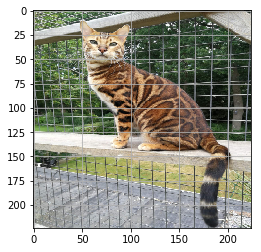

Predicted: [('n02123159', 'tiger_cat', 0.7528311), ('n02123045', 'tabby', 0.22409303)]


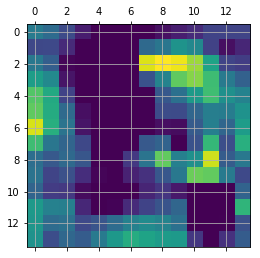

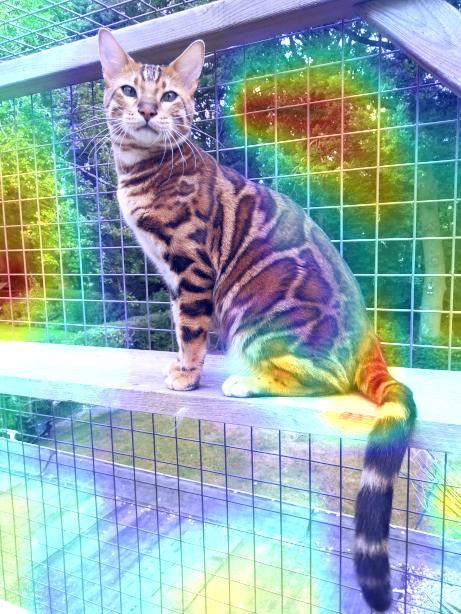

In [87]:
process_image(img_path1)

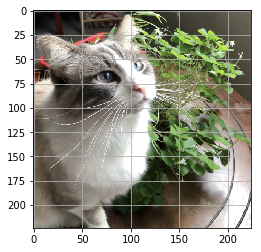

Predicted: [('n02123597', 'Siamese_cat', 0.37967652), ('n02124075', 'Egyptian_cat', 0.28091493)]


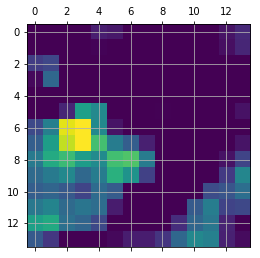

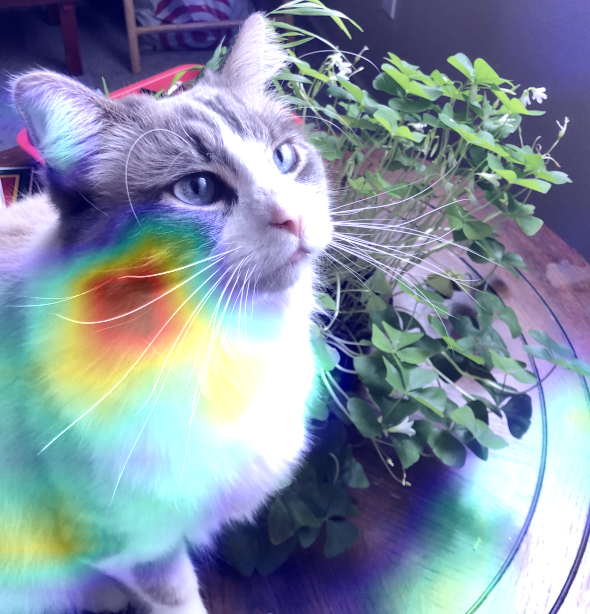

In [88]:
process_image(img_path2)

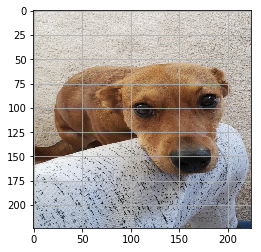

Predicted: [('n02107312', 'miniature_pinscher', 0.22141336), ('n02087394', 'Rhodesian_ridgeback', 0.15780027)]


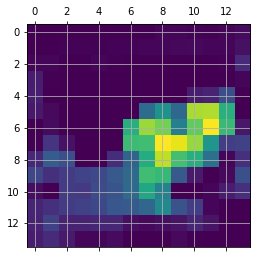

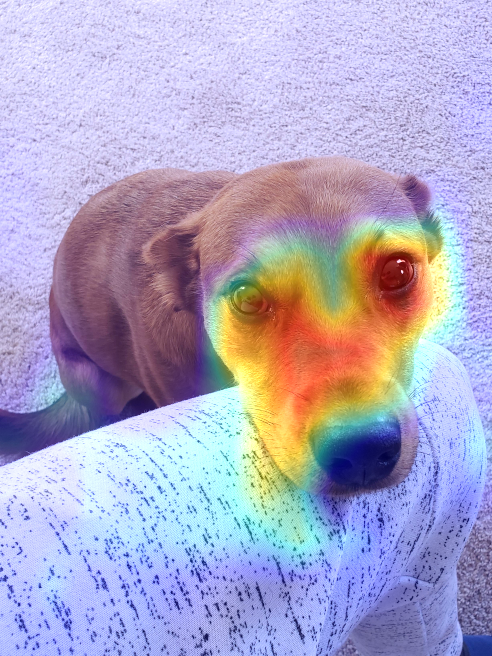

In [89]:
process_image(img_path3)

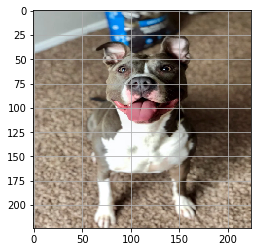

Predicted: [('n02096585', 'Boston_bull', 0.48071834), ('n02093428', 'American_Staffordshire_terrier', 0.17030458)]


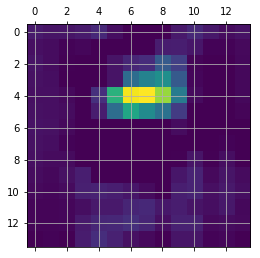

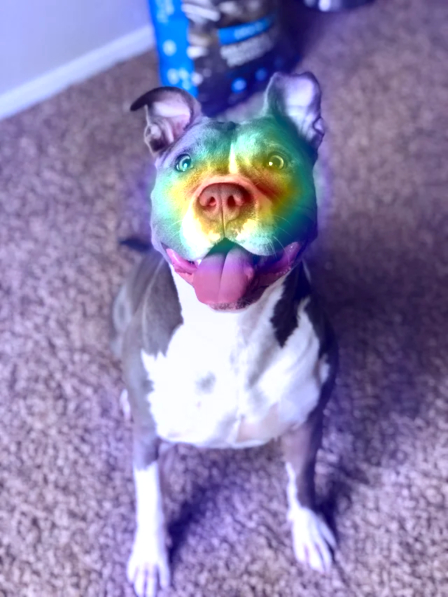

In [90]:
process_image(img_path4)

# Problem 4

Build an activation model that takes as input an image and produces as output the activation of the last conv layer of the model obtained in Problem 2. Using this activation model obtain the corresponding activations for the validation images. Apply t-SNE visualization to these activations to see how well the convnet separates cats from dogs.